##  Doğrusal Regresyon ile Satış Tahmini 👩‍💻

Satış Tahmini Modeli Geliştirme

Bu çalışma, çeşitli reklam kanallarında yapılan harcamalara dayalı olarak satış tahmini yapmayı amaçlamaktadır. Modelimiz, TV, radyo ve gazete reklam harcamalarına ilişkin verileri kullanarak bu reklam harcamalarının satış üzerindeki etkisini tahmin edecektir.

Değişkenler:

 • TV: TV reklam harcamaları
 • Radio: Radyo reklam harcamaları
 • Newspaper: Gazete reklam harcamaları
 • Sales: Satış miktarı

Bu bağlamda, doğrusal regresyon kullanarak satış tahmini işlemleri gerçekleştirilecektir. Modelin başarısı, tahmin sonuçlarının gerçek satış verileri ile karşılaştırılması yoluyla değerlendirilecektir.



**Gerekli kütüphaneleri içe aktarma**

📌 Her zamanki gibi gerekli kütüphaneleri içe aktarmakla başlayacağız.



In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.2f' %x)

from sklearn.linear_model import LinearRegression
from sklearn.metrics import  mean_squared_error , mean_absolute_error
from  sklearn.model_selection import  train_test_split , cross_val_score

**Scikit-Learn kullanarak OLS(Ortalama Kareler Yöntemi ) ile Basit Doğrusal Regresyon**

In [51]:
from google.colab import files
uploaded = files.upload()

df = pd.read_csv("advertising.csv" )
df.shape

X = df[["TV"]]
y = df[["sales"]]


Saving advertising.csv to advertising (7).csv


**Modelin Kurulması**


In [69]:
#Model
reg_model = LinearRegression().fit(X,y)

#y_hat = b + w*x
#sabit (b - bias)
b= reg_model.intercept_[0]
print("bias:",b)

#tv'nin katsayısı (w1)
w= reg_model.coef_[0][0]
print("coefficients:", w)


bias: 7.032593549127695
coefficients: 0.04753664043301975


**Tahmin**

In [70]:
#150 birimlik Tv harcaması olsa ne kadar satış olması beklenir ?

reg_model.intercept_[0] + reg_model.coef_[0][0] * 150

#500 birimlik Tv harcaası olsa ne kadar satış olması beklenir ?

reg_model.intercept_[0] + reg_model.coef_[0][0] * 500

df.describe().T



,count,mean,std,min,25%,50%,75%,max
radio,200.00,23.26,14.85,0.00,9.97,22.90,36.52,49.60
newspaper,200.00,30.55,21.78,0.30,12.75,25.75,45.10,114.00
sales,200.00,14.02,5.22,1.60,10.38,12.90,17.40,27.00


**Modelin Görselleştirilmesi**

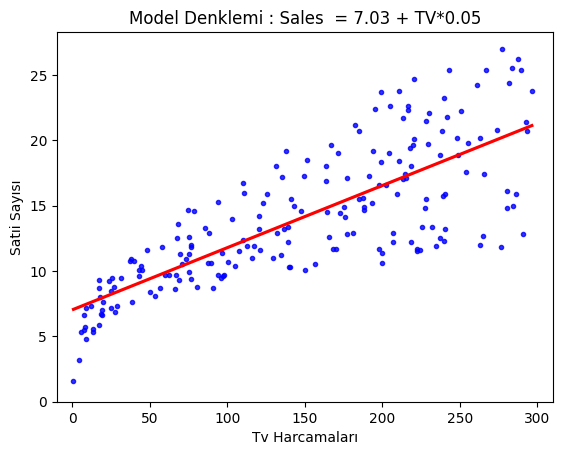

In [56]:
g = sns.regplot( x=X , y=y, scatter_kws={'color': 'b', 's' : 9 },
                    ci=False , color="r")
g.set_title(f"Model Denklemi : Sales  = {round(reg_model.intercept_[0],2)} + TV*{round(reg_model.coef_[0][0], 2)}")
g.set_ylabel("Satıi Sayısı")
g.set_xlabel("Tv Harcamaları")
plt.xlim(-10 , 310)
plt.ylim(bottom=0)
plt.show()

# Doğrusal Regresyon Tahmin Başarısı 🙂


In [62]:

# Veri setini yükle
df = pd.read_csv("advertising.csv", index_col=0)


# Model Tahminleri
y_pred = reg_model.predict(X)

# MSE (Ortalama Karesel Hata)
mse = mean_squared_error(y, y_pred)
print(f'MSE: {mse}')

# RMSE (Karekök Ortalama Karesel Hata)
rmse = np.sqrt(mse)
print(f'RMSE: {rmse}')

# MAE (Ortalama Mutlak Hata)
mae = mean_absolute_error(y, y_pred)
print(f'MAE: {mae}')

# R-Kare
r2 = reg_model.score(X, y)
print(f'R-Kare: {r2}')

MSE: 10.512652915656757
RMSE: 3.2423221486546887
MAE: 2.549806038927486
R-Kare: 0.611875050850071
